In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
print(tf.__version__)

2.1.0


In [3]:
# load data
train = pd.read_csv("train.csv", dtype='float32').iloc[:,1:20]
test = pd.read_csv("test.csv", dtype='float32').iloc[:,1:20]
train.shape, test.shape

((900, 19), (87, 19))

In [4]:
Xtrain = np.array(train.iloc[:,0:18])
Ytrain = np.array(train.iloc[:,18])
Xtest = np.array(test.iloc[:,0:18])
Ytest = np.array(test.iloc[:,18])

In [5]:
Xtest.shape, Ytest.shape

((87, 18), (87,))

In [6]:
Xtrain.shape, Ytrain.shape

((900, 18), (900,))

In [7]:
Ytrain = np.reshape(Ytrain,(900,1))
Ytest = np.reshape(Ytest,(87,1))

In [8]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

In [9]:
# constructing the autoencoder
# determine h through PCA on your own data

# try to find suitable initializers for your own data
h = 3
model = Sequential()
model.add(Dense(h, activation='relu', input_dim=18, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=1),bias_initializer=Constant(value=70)))
model.add(Dense(1, activation='relu', kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=1),bias_initializer=Constant(value=40)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 57        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras import optimizers, losses

model.compile(optimizer=optimizers.SGD(learning_rate=0.000001, decay=1e-7), loss='mean_squared_error')

In [11]:
from tensorflow.keras import callbacks

# the following callback to record losses after each batch
class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Xtrain,Ytrain,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Xtest,Ytest,verbose = 0))

MyMonitor = MyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)

In [12]:
# For saving the best model choosen by keras.
filepath = 'BestModel.h5'
checkpointer = callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, mode='auto', save_freq='epoch')

In [13]:
Monitor = model.fit(Xtrain, Ytrain, epochs=2000, batch_size=16, callbacks = [MyMonitor, es,checkpointer], validation_data = (Xtest, Ytest), verbose = 2)


Train on 900 samples, validate on 87 samples
Epoch 1/2000
900/900 - 5s - loss: 2184.6544 - val_loss: 826.3004
Epoch 2/2000
900/900 - 4s - loss: 816.5947 - val_loss: 714.4975
Epoch 3/2000
900/900 - 5s - loss: 720.1523 - val_loss: 637.0363
Epoch 4/2000
900/900 - 5s - loss: 644.8996 - val_loss: 588.4749
Epoch 5/2000
900/900 - 4s - loss: 583.5920 - val_loss: 563.3394
Epoch 6/2000
900/900 - 4s - loss: 519.0035 - val_loss: 452.1184
Epoch 7/2000
900/900 - 4s - loss: 464.0120 - val_loss: 447.2113
Epoch 8/2000
900/900 - 4s - loss: 412.7835 - val_loss: 395.5834
Epoch 9/2000
900/900 - 4s - loss: 360.4489 - val_loss: 326.2877
Epoch 10/2000
900/900 - 4s - loss: 310.9323 - val_loss: 273.2014
Epoch 11/2000
900/900 - 4s - loss: 264.4729 - val_loss: 218.7300
Epoch 12/2000
900/900 - 4s - loss: 226.4278 - val_loss: 183.5244
Epoch 13/2000
900/900 - 4s - loss: 188.9362 - val_loss: 152.8730
Epoch 14/2000
900/900 - 4s - loss: 158.3084 - val_loss: 139.5866
Epoch 15/2000
900/900 - 5s - loss: 134.9610 - val_los

900/900 - 5s - loss: 18.9750 - val_loss: 19.7393
Epoch 96/2000
900/900 - 5s - loss: 18.4941 - val_loss: 19.8252
Epoch 97/2000
900/900 - 7s - loss: 18.3383 - val_loss: 19.1342
Epoch 98/2000


900/900 - 8s - loss: 18.2353 - val_loss: 19.0280
Epoch 99/2000
900/900 - 6s - loss: 18.1299 - val_loss: 22.2602
Epoch 100/2000


900/900 - 7s - loss: 18.1543 - val_loss: 20.5729
Epoch 101/2000
900/900 - 5s - loss: 18.2790 - val_loss: 19.1322
Epoch 102/2000


900/900 - 6s - loss: 17.7948 - val_loss: 25.9515
Epoch 103/2000
900/900 - 5s - loss: 17.9176 - val_loss: 20.0979
Epoch 104/2000
900/900 - 5s - loss: 17.6306 - val_loss: 18.9390
Epoch 105/2000
900/900 - 5s - loss: 17.6660 - val_loss: 20.8808
Epoch 106/2000
900/900 - 5s - loss: 17.2152 - val_loss: 18.4248
Epoch 107/2000
900/900 - 5s - loss: 17.4347 - val_loss: 18.9832
Epoch 108/2000
900/900 - 5s - loss: 17.4263 - val_loss: 18.9533
Epoch 109/2000
900/900 - 5s - loss: 17.1210 - val_loss: 18.8724
Epoch 110/2000
900/900 - 5s - loss: 17.3810 - val_loss: 18.0228
Epoch 111/2000
900/900 - 4s - loss: 16.8008 - val_loss: 27.4950
Epoch 112/2000
900/900 - 5s - loss: 16.9903 - val_loss: 19.0637
Epoch 113/2000
900/900 - 5s - loss: 16.7987 - val_loss: 17.8788
Epoch 114/2000
900/900 - 5s - loss: 17.1489 - val_loss: 19.0113
Epoch 115/2000
900/900 - 4s - loss: 16.8573 - val_loss: 20.7100
Epoch 116/2000
900/900 - 5s - loss: 16.7452 - val_loss: 17.8155
Epoch 117/2000
900/900 - 5s - loss: 16.6843 - val_loss:

900/900 - 5s - loss: 12.9979 - val_loss: 15.2319
Epoch 198/2000
900/900 - 5s - loss: 12.9843 - val_loss: 17.2778
Epoch 199/2000
900/900 - 5s - loss: 13.1905 - val_loss: 28.6863
Epoch 200/2000
900/900 - 5s - loss: 13.0127 - val_loss: 18.7499
Epoch 201/2000
900/900 - 5s - loss: 12.6899 - val_loss: 16.1827
Epoch 202/2000
900/900 - 5s - loss: 12.8417 - val_loss: 21.2700
Epoch 203/2000
900/900 - 5s - loss: 12.7597 - val_loss: 20.3778
Epoch 204/2000
900/900 - 5s - loss: 12.8831 - val_loss: 17.2610
Epoch 205/2000
900/900 - 5s - loss: 12.8245 - val_loss: 22.1406
Epoch 206/2000
900/900 - 5s - loss: 12.7886 - val_loss: 15.3257
Epoch 207/2000
900/900 - 5s - loss: 12.8180 - val_loss: 18.1214
Epoch 208/2000
900/900 - 5s - loss: 12.7257 - val_loss: 38.2529
Epoch 209/2000
900/900 - 5s - loss: 13.0266 - val_loss: 17.7900
Epoch 210/2000
900/900 - 5s - loss: 12.4857 - val_loss: 16.6045
Epoch 211/2000
900/900 - 5s - loss: 12.4982 - val_loss: 15.4339
Epoch 212/2000
900/900 - 5s - loss: 12.7313 - val_loss:

900/900 - 6s - loss: 12.2741 - val_loss: 15.1845
Epoch 224/2000
900/900 - 5s - loss: 12.4775 - val_loss: 15.3106
Epoch 225/2000
900/900 - 5s - loss: 12.3396 - val_loss: 16.5251
Epoch 226/2000
900/900 - 5s - loss: 12.4788 - val_loss: 15.7919
Epoch 227/2000
900/900 - 5s - loss: 12.4648 - val_loss: 14.8856
Epoch 228/2000
900/900 - 5s - loss: 11.9660 - val_loss: 20.5807
Epoch 229/2000
900/900 - 5s - loss: 11.9009 - val_loss: 15.3738
Epoch 230/2000
900/900 - 5s - loss: 12.2665 - val_loss: 14.8700
Epoch 231/2000
900/900 - 4s - loss: 12.2692 - val_loss: 22.4815
Epoch 232/2000
900/900 - 4s - loss: 12.4823 - val_loss: 15.9279
Epoch 233/2000
900/900 - 4s - loss: 12.0851 - val_loss: 14.8394
Epoch 234/2000
900/900 - 4s - loss: 12.1143 - val_loss: 15.4410
Epoch 235/2000
900/900 - 4s - loss: 12.0446 - val_loss: 14.8727
Epoch 236/2000
900/900 - 5s - loss: 11.9846 - val_loss: 15.9451
Epoch 237/2000
900/900 - 5s - loss: 12.0777 - val_loss: 17.3287
Epoch 238/2000
900/900 - 5s - loss: 11.9416 - val_loss:

Epoch 293/2000
900/900 - 5s - loss: 11.4822 - val_loss: 16.3252
Epoch 294/2000
900/900 - 4s - loss: 11.2854 - val_loss: 15.2376
Epoch 295/2000
900/900 - 4s - loss: 11.3903 - val_loss: 19.0519
Epoch 296/2000
900/900 - 4s - loss: 11.1234 - val_loss: 15.5123
Epoch 297/2000
900/900 - 4s - loss: 11.3458 - val_loss: 16.4501
Epoch 298/2000
900/900 - 4s - loss: 11.3240 - val_loss: 14.7168
Epoch 299/2000
900/900 - 4s - loss: 11.3682 - val_loss: 16.1659
Epoch 300/2000
900/900 - 4s - loss: 11.3402 - val_loss: 15.3145
Epoch 301/2000
900/900 - 4s - loss: 11.3069 - val_loss: 16.5961
Epoch 302/2000
900/900 - 5s - loss: 11.3598 - val_loss: 14.6383
Epoch 303/2000
900/900 - 4s - loss: 11.0955 - val_loss: 19.3463
Epoch 304/2000
900/900 - 5s - loss: 11.2501 - val_loss: 14.4292
Epoch 305/2000
900/900 - 4s - loss: 11.2516 - val_loss: 14.7286
Epoch 306/2000
900/900 - 4s - loss: 11.4995 - val_loss: 15.8508
Epoch 307/2000
900/900 - 4s - loss: 11.2624 - val_loss: 14.7261
Epoch 308/2000
900/900 - 4s - loss: 11.0

900/900 - 4s - loss: 10.4332 - val_loss: 14.1408
Epoch 409/2000
900/900 - 4s - loss: 10.4286 - val_loss: 17.7037
Epoch 410/2000
900/900 - 4s - loss: 10.2531 - val_loss: 15.7386
Epoch 411/2000
900/900 - 4s - loss: 10.3415 - val_loss: 13.9706
Epoch 412/2000
900/900 - 4s - loss: 10.1764 - val_loss: 14.3719
Epoch 413/2000
900/900 - 4s - loss: 10.2963 - val_loss: 18.9610
Epoch 414/2000
900/900 - 4s - loss: 10.3342 - val_loss: 15.6254
Epoch 415/2000
900/900 - 4s - loss: 10.3460 - val_loss: 15.1370
Epoch 416/2000
900/900 - 4s - loss: 10.4585 - val_loss: 16.2667
Epoch 417/2000
900/900 - 4s - loss: 10.1970 - val_loss: 14.0333
Epoch 418/2000
900/900 - 4s - loss: 10.3652 - val_loss: 14.7337
Epoch 419/2000
900/900 - 4s - loss: 10.1673 - val_loss: 15.6464
Epoch 420/2000
900/900 - 4s - loss: 10.2475 - val_loss: 16.4528
Epoch 421/2000
900/900 - 4s - loss: 10.1988 - val_loss: 13.8670
Epoch 422/2000
900/900 - 4s - loss: 10.2081 - val_loss: 21.1574
Epoch 423/2000
900/900 - 4s - loss: 10.1712 - val_loss:

Epoch 525/2000
900/900 - 5s - loss: 9.5863 - val_loss: 15.5261
Epoch 526/2000
900/900 - 5s - loss: 9.5706 - val_loss: 13.3730
Epoch 527/2000
900/900 - 4s - loss: 9.6542 - val_loss: 14.9513
Epoch 528/2000
900/900 - 5s - loss: 9.6264 - val_loss: 15.6238
Epoch 529/2000
900/900 - 5s - loss: 9.6830 - val_loss: 13.5442
Epoch 530/2000
900/900 - 4s - loss: 9.6329 - val_loss: 17.0882
Epoch 531/2000
900/900 - 5s - loss: 9.5768 - val_loss: 13.6563
Epoch 532/2000
900/900 - 4s - loss: 9.8128 - val_loss: 19.6028
Epoch 533/2000
900/900 - 4s - loss: 9.6793 - val_loss: 13.7535
Epoch 534/2000
900/900 - 4s - loss: 9.4864 - val_loss: 14.5300
Epoch 535/2000
900/900 - 5s - loss: 9.4137 - val_loss: 15.8383
Epoch 536/2000
900/900 - 4s - loss: 9.5698 - val_loss: 15.2851
Epoch 537/2000
900/900 - 4s - loss: 9.8447 - val_loss: 19.0454
Epoch 538/2000
900/900 - 4s - loss: 9.6889 - val_loss: 13.3269
Epoch 539/2000
900/900 - 4s - loss: 9.6124 - val_loss: 18.5310
Epoch 540/2000
900/900 - 4s - loss: 9.4783 - val_loss: 

Epoch 635/2000
900/900 - 5s - loss: 9.2062 - val_loss: 12.9118
Epoch 636/2000
900/900 - 4s - loss: 9.1340 - val_loss: 14.1628
Epoch 637/2000
900/900 - 4s - loss: 9.0964 - val_loss: 15.6236
Epoch 638/2000
900/900 - 4s - loss: 9.0064 - val_loss: 12.9461
Epoch 639/2000
900/900 - 4s - loss: 9.0577 - val_loss: 15.1432
Epoch 640/2000
900/900 - 4s - loss: 9.1565 - val_loss: 13.8103
Epoch 641/2000
900/900 - 4s - loss: 9.1784 - val_loss: 16.0315
Epoch 642/2000
900/900 - 4s - loss: 9.1214 - val_loss: 12.9227
Epoch 643/2000
900/900 - 4s - loss: 9.1401 - val_loss: 19.5424
Epoch 644/2000
900/900 - 4s - loss: 9.4406 - val_loss: 13.5402
Epoch 645/2000
900/900 - 4s - loss: 9.0816 - val_loss: 20.5799
Epoch 646/2000
900/900 - 5s - loss: 9.2644 - val_loss: 13.0650
Epoch 647/2000
900/900 - 4s - loss: 9.2725 - val_loss: 13.6843
Epoch 648/2000
900/900 - 4s - loss: 9.0152 - val_loss: 13.6367
Epoch 649/2000
900/900 - 4s - loss: 8.9984 - val_loss: 15.3506
Epoch 650/2000
900/900 - 4s - loss: 9.0541 - val_loss: 

900/900 - 5s - loss: 8.8238 - val_loss: 17.2474
Epoch 706/2000
900/900 - 5s - loss: 9.1134 - val_loss: 14.2175
Epoch 707/2000
900/900 - 5s - loss: 8.7893 - val_loss: 26.2647
Epoch 708/2000
900/900 - 6s - loss: 9.5228 - val_loss: 12.7624
Epoch 709/2000
900/900 - 5s - loss: 8.9888 - val_loss: 27.6587
Epoch 710/2000
900/900 - 5s - loss: 8.8193 - val_loss: 12.7470
Epoch 711/2000
900/900 - 4s - loss: 8.8273 - val_loss: 13.9409
Epoch 712/2000
900/900 - 4s - loss: 9.0944 - val_loss: 12.6778
Epoch 713/2000
900/900 - 4s - loss: 8.8324 - val_loss: 14.9557
Epoch 714/2000
900/900 - 4s - loss: 8.8958 - val_loss: 13.4583
Epoch 715/2000
900/900 - 5s - loss: 8.7639 - val_loss: 12.9796
Epoch 716/2000
900/900 - 5s - loss: 8.6576 - val_loss: 46.0380
Epoch 717/2000
900/900 - 5s - loss: 9.2566 - val_loss: 13.6822
Epoch 718/2000
900/900 - 5s - loss: 8.8182 - val_loss: 12.6731
Epoch 719/2000
900/900 - 5s - loss: 8.7262 - val_loss: 12.8413
Epoch 720/2000
900/900 - 5s - loss: 9.0025 - val_loss: 12.6110
Epoch 7

900/900 - 5s - loss: 8.6765 - val_loss: 14.6499
Epoch 727/2000
900/900 - 5s - loss: 8.7267 - val_loss: 12.5726
Epoch 728/2000
900/900 - 4s - loss: 8.8672 - val_loss: 12.6341
Epoch 729/2000
900/900 - 4s - loss: 8.7703 - val_loss: 16.8013
Epoch 730/2000
900/900 - 4s - loss: 8.9545 - val_loss: 13.6233
Epoch 731/2000
900/900 - 4s - loss: 8.9835 - val_loss: 14.2873
Epoch 732/2000
900/900 - 4s - loss: 9.1735 - val_loss: 14.1930
Epoch 733/2000
900/900 - 5s - loss: 8.6384 - val_loss: 41.7282
Epoch 734/2000
900/900 - 4s - loss: 9.4044 - val_loss: 16.1127
Epoch 735/2000
900/900 - 4s - loss: 8.8267 - val_loss: 12.5482
Epoch 736/2000
900/900 - 4s - loss: 8.9746 - val_loss: 13.7398
Epoch 737/2000
900/900 - 4s - loss: 8.8537 - val_loss: 22.7412
Epoch 738/2000
900/900 - 5s - loss: 9.2624 - val_loss: 12.6323
Epoch 739/2000
900/900 - 5s - loss: 8.6988 - val_loss: 14.0099
Epoch 740/2000
900/900 - 5s - loss: 8.8723 - val_loss: 12.8917
Epoch 741/2000
900/900 - 5s - loss: 8.7551 - val_loss: 12.7497
Epoch 7

Epoch 761/2000
900/900 - 4s - loss: 8.6421 - val_loss: 12.5108
Epoch 762/2000
900/900 - 4s - loss: 8.9097 - val_loss: 15.6703
Epoch 763/2000
900/900 - 4s - loss: 8.7631 - val_loss: 12.7323
Epoch 764/2000
900/900 - 5s - loss: 8.7030 - val_loss: 13.9526
Epoch 765/2000
900/900 - 5s - loss: 8.7932 - val_loss: 15.2497
Epoch 766/2000
900/900 - 5s - loss: 8.5959 - val_loss: 14.4450
Epoch 767/2000
900/900 - 5s - loss: 8.7876 - val_loss: 12.6295
Epoch 768/2000
900/900 - 5s - loss: 8.7588 - val_loss: 13.1358
Epoch 769/2000
900/900 - 5s - loss: 8.5979 - val_loss: 12.4904
Epoch 770/2000
900/900 - 4s - loss: 8.6247 - val_loss: 13.8414
Epoch 771/2000
900/900 - 4s - loss: 8.6763 - val_loss: 13.2780
Epoch 772/2000
900/900 - 4s - loss: 8.6920 - val_loss: 16.0602
Epoch 773/2000
900/900 - 4s - loss: 8.8224 - val_loss: 17.8625
Epoch 774/2000
900/900 - 4s - loss: 8.7221 - val_loss: 14.5146
Epoch 775/2000
900/900 - 5s - loss: 8.7155 - val_loss: 12.6132
Epoch 776/2000
900/900 - 5s - loss: 8.6699 - val_loss: 

900/900 - 6s - loss: 8.7277 - val_loss: 15.4937
Epoch 789/2000
900/900 - 5s - loss: 8.6992 - val_loss: 13.2639
Epoch 790/2000
900/900 - 5s - loss: 8.7205 - val_loss: 15.1901
Epoch 791/2000
900/900 - 6s - loss: 8.5810 - val_loss: 12.3553
Epoch 792/2000
900/900 - 5s - loss: 8.7314 - val_loss: 12.6742
Epoch 793/2000
900/900 - 6s - loss: 8.5683 - val_loss: 12.3328
Epoch 794/2000
900/900 - 5s - loss: 8.6375 - val_loss: 12.7733
Epoch 795/2000
900/900 - 5s - loss: 8.6251 - val_loss: 13.9314
Epoch 796/2000
900/900 - 4s - loss: 8.6050 - val_loss: 12.5894
Epoch 797/2000
900/900 - 5s - loss: 8.6098 - val_loss: 13.3964
Epoch 798/2000
900/900 - 4s - loss: 8.7633 - val_loss: 12.3529
Epoch 799/2000
900/900 - 4s - loss: 8.6914 - val_loss: 12.8642
Epoch 800/2000
900/900 - 4s - loss: 8.6435 - val_loss: 15.3941


Epoch 801/2000
900/900 - 5s - loss: 8.5926 - val_loss: 18.3286
Epoch 802/2000
900/900 - 4s - loss: 8.5555 - val_loss: 17.1401
Epoch 803/2000
900/900 - 5s - loss: 8.7048 - val_loss: 12.4333
Epoch 804/2000
900/900 - 5s - loss: 8.7337 - val_loss: 15.8779
Epoch 805/2000
900/900 - 4s - loss: 8.8399 - val_loss: 16.7120
Epoch 806/2000
900/900 - 4s - loss: 8.8095 - val_loss: 15.2913
Epoch 807/2000
900/900 - 4s - loss: 8.4849 - val_loss: 13.4071
Epoch 808/2000
900/900 - 5s - loss: 8.5812 - val_loss: 12.3048
Epoch 809/2000
900/900 - 4s - loss: 8.7219 - val_loss: 16.7212
Epoch 810/2000
900/900 - 4s - loss: 8.5541 - val_loss: 16.4111
Epoch 811/2000
900/900 - 5s - loss: 8.5430 - val_loss: 15.6366
Epoch 812/2000
900/900 - 4s - loss: 8.5757 - val_loss: 14.0491
Epoch 813/2000
900/900 - 4s - loss: 8.6707 - val_loss: 14.7346
Epoch 814/2000
900/900 - 4s - loss: 8.7353 - val_loss: 12.7896
Epoch 815/2000
900/900 - 4s - loss: 8.6855 - val_loss: 13.1719
Epoch 816/2000
900/900 - 4s - loss: 8.5497 - val_loss: 

Epoch 903/2000
900/900 - 4s - loss: 8.3701 - val_loss: 12.3036
Epoch 904/2000
900/900 - 4s - loss: 8.3632 - val_loss: 13.0135
Epoch 905/2000
900/900 - 4s - loss: 8.4276 - val_loss: 12.2537
Epoch 906/2000
900/900 - 4s - loss: 8.6054 - val_loss: 12.1866
Epoch 907/2000
900/900 - 4s - loss: 8.5303 - val_loss: 13.9617
Epoch 908/2000
900/900 - 5s - loss: 8.3960 - val_loss: 12.0074
Epoch 909/2000
900/900 - 4s - loss: 8.5241 - val_loss: 15.6074
Epoch 910/2000
900/900 - 4s - loss: 8.2965 - val_loss: 11.9960
Epoch 911/2000
900/900 - 4s - loss: 8.4614 - val_loss: 14.1603
Epoch 912/2000
900/900 - 5s - loss: 8.6008 - val_loss: 16.8665
Epoch 913/2000
900/900 - 4s - loss: 8.4384 - val_loss: 11.9770
Epoch 914/2000
900/900 - 4s - loss: 8.4918 - val_loss: 12.1427
Epoch 915/2000
900/900 - 4s - loss: 8.2197 - val_loss: 13.5605
Epoch 916/2000
900/900 - 4s - loss: 8.5269 - val_loss: 13.5790
Epoch 917/2000
900/900 - 4s - loss: 8.6003 - val_loss: 12.2381
Epoch 918/2000
900/900 - 4s - loss: 8.3370 - val_loss: 

Epoch 1009/2000
900/900 - 4s - loss: 8.1996 - val_loss: 11.7192
Epoch 1010/2000
900/900 - 4s - loss: 8.1419 - val_loss: 12.2208
Epoch 1011/2000
900/900 - 4s - loss: 8.2096 - val_loss: 12.2928
Epoch 1012/2000
900/900 - 4s - loss: 8.0429 - val_loss: 11.7199
Epoch 1013/2000
900/900 - 5s - loss: 8.3278 - val_loss: 13.1987
Epoch 1014/2000
900/900 - 5s - loss: 8.1671 - val_loss: 16.5840
Epoch 1015/2000
900/900 - 4s - loss: 8.1116 - val_loss: 11.7088
Epoch 1016/2000
900/900 - 4s - loss: 8.1250 - val_loss: 15.5521
Epoch 1017/2000
900/900 - 4s - loss: 8.1876 - val_loss: 12.4421
Epoch 1018/2000
900/900 - 4s - loss: 8.2252 - val_loss: 11.7198
Epoch 1019/2000
900/900 - 4s - loss: 8.3768 - val_loss: 12.5224
Epoch 1020/2000
900/900 - 4s - loss: 8.0959 - val_loss: 12.4758
Epoch 1021/2000
900/900 - 4s - loss: 8.2488 - val_loss: 14.0914
Epoch 1022/2000
900/900 - 4s - loss: 8.2022 - val_loss: 12.1254
Epoch 1023/2000
900/900 - 4s - loss: 8.1213 - val_loss: 18.4313
Epoch 1024/2000
900/900 - 5s - loss: 8.4

Epoch 1084/2000
900/900 - 4s - loss: 8.0476 - val_loss: 13.9505
Epoch 1085/2000
900/900 - 4s - loss: 7.9430 - val_loss: 15.7534
Epoch 1086/2000
900/900 - 4s - loss: 7.8730 - val_loss: 12.8652
Epoch 1087/2000
900/900 - 4s - loss: 8.0477 - val_loss: 14.4974
Epoch 1088/2000
900/900 - 4s - loss: 8.0664 - val_loss: 16.2304
Epoch 1089/2000
900/900 - 4s - loss: 8.0050 - val_loss: 12.1880
Epoch 1090/2000
900/900 - 4s - loss: 8.2824 - val_loss: 11.6323
Epoch 1091/2000
900/900 - 4s - loss: 7.7451 - val_loss: 12.8479
Epoch 1092/2000
900/900 - 5s - loss: 8.1824 - val_loss: 14.5553
Epoch 1093/2000
900/900 - 5s - loss: 8.1126 - val_loss: 12.6549
Epoch 1094/2000
900/900 - 4s - loss: 8.0855 - val_loss: 25.4531
Epoch 1095/2000
900/900 - 4s - loss: 8.1800 - val_loss: 11.9791
Epoch 1096/2000
900/900 - 5s - loss: 8.0385 - val_loss: 12.8614
Epoch 1097/2000
900/900 - 4s - loss: 8.2105 - val_loss: 11.5838
Epoch 1098/2000
900/900 - 4s - loss: 8.1156 - val_loss: 11.6099
Epoch 1099/2000
900/900 - 4s - loss: 7.9

Epoch 1203/2000
900/900 - 4s - loss: 8.0091 - val_loss: 12.0294
Epoch 1204/2000
900/900 - 5s - loss: 7.8609 - val_loss: 23.0202
Epoch 1205/2000
900/900 - 4s - loss: 8.1258 - val_loss: 12.3739
Epoch 1206/2000
900/900 - 4s - loss: 7.7300 - val_loss: 12.4082
Epoch 1207/2000
900/900 - 4s - loss: 8.3132 - val_loss: 13.0158
Epoch 1208/2000
900/900 - 4s - loss: 7.8732 - val_loss: 16.7006
Epoch 1209/2000
900/900 - 4s - loss: 7.9802 - val_loss: 12.6555
Epoch 1210/2000
900/900 - 4s - loss: 7.7721 - val_loss: 11.2891
Epoch 1211/2000
900/900 - 4s - loss: 7.8038 - val_loss: 12.3816
Epoch 1212/2000
900/900 - 4s - loss: 7.8170 - val_loss: 11.2833
Epoch 1213/2000
900/900 - 4s - loss: 7.9517 - val_loss: 11.4669
Epoch 1214/2000
900/900 - 4s - loss: 7.8328 - val_loss: 11.4990
Epoch 1215/2000
900/900 - 5s - loss: 7.8031 - val_loss: 12.6097
Epoch 1216/2000
900/900 - 4s - loss: 8.0284 - val_loss: 11.5999
Epoch 1217/2000
900/900 - 4s - loss: 7.7961 - val_loss: 11.8417
Epoch 1218/2000
900/900 - 4s - loss: 7.9

900/900 - 4s - loss: 7.9295 - val_loss: 11.4235
Epoch 1319/2000
900/900 - 4s - loss: 7.8884 - val_loss: 11.4974
Epoch 1320/2000
900/900 - 4s - loss: 7.7257 - val_loss: 11.9684
Epoch 1321/2000
900/900 - 4s - loss: 7.6410 - val_loss: 12.5786
Epoch 1322/2000
900/900 - 4s - loss: 7.8476 - val_loss: 11.9049
Epoch 1323/2000
900/900 - 4s - loss: 7.8301 - val_loss: 11.8839
Epoch 1324/2000
900/900 - 4s - loss: 7.8009 - val_loss: 13.0172
Epoch 1325/2000
900/900 - 4s - loss: 7.6760 - val_loss: 14.5807
Epoch 1326/2000
900/900 - 4s - loss: 7.6551 - val_loss: 11.0908
Epoch 1327/2000
900/900 - 4s - loss: 7.6661 - val_loss: 11.4039
Epoch 1328/2000
900/900 - 4s - loss: 7.7771 - val_loss: 14.9829
Epoch 1329/2000
900/900 - 4s - loss: 7.7255 - val_loss: 11.5562
Epoch 1330/2000
900/900 - 4s - loss: 7.5551 - val_loss: 15.8786
Epoch 1331/2000
900/900 - 4s - loss: 7.9045 - val_loss: 12.5418
Epoch 1332/2000
900/900 - 4s - loss: 7.6953 - val_loss: 19.0577
Epoch 1333/2000
900/900 - 4s - loss: 7.8623 - val_loss: 

900/900 - 4s - loss: 7.8026 - val_loss: 13.6086
Epoch 1419/2000
900/900 - 4s - loss: 7.6551 - val_loss: 11.6075
Epoch 1420/2000
900/900 - 4s - loss: 7.5957 - val_loss: 12.8130
Epoch 1421/2000
900/900 - 4s - loss: 7.5911 - val_loss: 12.6869
Epoch 1422/2000
900/900 - 4s - loss: 7.6231 - val_loss: 10.8869
Epoch 1423/2000
900/900 - 4s - loss: 7.7171 - val_loss: 12.8825
Epoch 1424/2000
900/900 - 4s - loss: 7.6950 - val_loss: 23.0642
Epoch 1425/2000
900/900 - 4s - loss: 7.7059 - val_loss: 13.9178
Epoch 1426/2000
900/900 - 4s - loss: 7.5696 - val_loss: 11.0222
Epoch 1427/2000
900/900 - 4s - loss: 7.6271 - val_loss: 11.6727
Epoch 1428/2000
900/900 - 4s - loss: 7.5319 - val_loss: 10.8965
Epoch 1429/2000
900/900 - 4s - loss: 7.7091 - val_loss: 12.5999
Epoch 1430/2000
900/900 - 4s - loss: 7.6201 - val_loss: 15.0706
Epoch 1431/2000
900/900 - 4s - loss: 7.7531 - val_loss: 14.6011
Epoch 1432/2000
900/900 - 4s - loss: 7.5317 - val_loss: 11.0758
Epoch 1433/2000
900/900 - 5s - loss: 7.6462 - val_loss: 

900/900 - 5s - loss: 7.7159 - val_loss: 10.9853
Epoch 1536/2000
900/900 - 5s - loss: 7.4905 - val_loss: 11.9611
Epoch 1537/2000
900/900 - 5s - loss: 7.3431 - val_loss: 10.7767
Epoch 1538/2000
900/900 - 5s - loss: 7.6981 - val_loss: 14.4824
Epoch 1539/2000
900/900 - 5s - loss: 7.5818 - val_loss: 11.3295
Epoch 1540/2000
900/900 - 4s - loss: 7.6520 - val_loss: 12.8653
Epoch 1541/2000
900/900 - 4s - loss: 7.6009 - val_loss: 11.7121
Epoch 1542/2000
900/900 - 5s - loss: 7.6199 - val_loss: 10.9753
Epoch 1543/2000
900/900 - 5s - loss: 7.5490 - val_loss: 10.7233
Epoch 1544/2000
900/900 - 5s - loss: 7.7063 - val_loss: 10.7186
Epoch 1545/2000
900/900 - 5s - loss: 7.6201 - val_loss: 11.6607
Epoch 1546/2000
900/900 - 4s - loss: 7.5253 - val_loss: 11.9164
Epoch 1547/2000
900/900 - 4s - loss: 7.6490 - val_loss: 11.2259
Epoch 1548/2000
900/900 - 4s - loss: 7.6310 - val_loss: 13.0548
Epoch 1549/2000
900/900 - 4s - loss: 7.7624 - val_loss: 11.2503
Epoch 1550/2000
900/900 - 4s - loss: 7.6162 - val_loss: 

Epoch 1651/2000
900/900 - 4s - loss: 7.4904 - val_loss: 11.0133
Epoch 1652/2000
900/900 - 4s - loss: 7.7102 - val_loss: 11.1704
Epoch 1653/2000
900/900 - 4s - loss: 7.5844 - val_loss: 15.5592
Epoch 1654/2000
900/900 - 4s - loss: 7.5414 - val_loss: 12.5138
Epoch 1655/2000
900/900 - 4s - loss: 7.5053 - val_loss: 11.5102
Epoch 1656/2000
900/900 - 4s - loss: 7.5444 - val_loss: 11.4931
Epoch 1657/2000
900/900 - 4s - loss: 7.5094 - val_loss: 12.6522
Epoch 1658/2000
900/900 - 4s - loss: 7.6377 - val_loss: 12.2236
Epoch 1659/2000
900/900 - 4s - loss: 7.4807 - val_loss: 10.5773
Epoch 1660/2000
900/900 - 4s - loss: 7.5136 - val_loss: 14.6939
Epoch 1661/2000
900/900 - 4s - loss: 7.6751 - val_loss: 12.0237
Epoch 1662/2000
900/900 - 4s - loss: 7.4875 - val_loss: 10.5618
Epoch 1663/2000
900/900 - 4s - loss: 7.6619 - val_loss: 10.8890
Epoch 1664/2000
900/900 - 4s - loss: 7.4962 - val_loss: 15.9593
Epoch 1665/2000
900/900 - 4s - loss: 7.4817 - val_loss: 13.9155
Epoch 1666/2000
900/900 - 4s - loss: 7.5

Epoch 1761/2000
900/900 - 4s - loss: 7.3078 - val_loss: 13.8580
Epoch 1762/2000
900/900 - 4s - loss: 7.4007 - val_loss: 10.7253
Epoch 1763/2000
900/900 - 4s - loss: 7.3156 - val_loss: 10.7864
Epoch 1764/2000
900/900 - 4s - loss: 7.5333 - val_loss: 21.0990
Epoch 1765/2000
900/900 - 4s - loss: 7.6002 - val_loss: 10.5326
Epoch 1766/2000
900/900 - 4s - loss: 7.3826 - val_loss: 36.8383
Epoch 1767/2000
900/900 - 4s - loss: 7.8025 - val_loss: 11.0219
Epoch 1768/2000
900/900 - 4s - loss: 7.2682 - val_loss: 12.6967
Epoch 1769/2000
900/900 - 4s - loss: 7.5108 - val_loss: 11.2864
Epoch 1770/2000
900/900 - 4s - loss: 7.3830 - val_loss: 15.0648
Epoch 1771/2000
900/900 - 4s - loss: 7.4088 - val_loss: 11.2590
Epoch 1772/2000
900/900 - 4s - loss: 7.5681 - val_loss: 11.4392
Epoch 1773/2000
900/900 - 4s - loss: 7.4466 - val_loss: 13.5670
Epoch 1774/2000
900/900 - 5s - loss: 7.3600 - val_loss: 10.7237
Epoch 1775/2000
900/900 - 4s - loss: 7.5178 - val_loss: 11.8710
Epoch 1776/2000
900/900 - 4s - loss: 7.3

900/900 - 4s - loss: 7.4594 - val_loss: 10.5132
Epoch 1864/2000
900/900 - 4s - loss: 7.3644 - val_loss: 10.8638
Epoch 1865/2000
900/900 - 4s - loss: 7.3466 - val_loss: 14.4655
Epoch 1866/2000
900/900 - 4s - loss: 7.4292 - val_loss: 10.3267
Epoch 1867/2000
900/900 - 4s - loss: 7.4511 - val_loss: 11.4440
Epoch 1868/2000
900/900 - 4s - loss: 7.3513 - val_loss: 13.1638
Epoch 1869/2000
900/900 - 4s - loss: 7.3984 - val_loss: 12.2205
Epoch 1870/2000
900/900 - 4s - loss: 7.4615 - val_loss: 12.1048
Epoch 1871/2000
900/900 - 4s - loss: 7.4033 - val_loss: 10.3927
Epoch 1872/2000
900/900 - 4s - loss: 7.4693 - val_loss: 10.4281
Epoch 1873/2000
900/900 - 4s - loss: 7.3206 - val_loss: 10.3266
Epoch 1874/2000
900/900 - 4s - loss: 7.3123 - val_loss: 14.3509
Epoch 1875/2000
900/900 - 4s - loss: 7.3520 - val_loss: 11.5194
Epoch 1876/2000
900/900 - 4s - loss: 7.3130 - val_loss: 12.0015
Epoch 1877/2000
900/900 - 4s - loss: 7.4855 - val_loss: 10.7447
Epoch 1878/2000
900/900 - 4s - loss: 7.3819 - val_loss: 

Epoch 1979/2000
900/900 - 4s - loss: 7.3030 - val_loss: 10.7389
Epoch 1980/2000
900/900 - 4s - loss: 7.3272 - val_loss: 10.5474
Epoch 1981/2000
900/900 - 4s - loss: 7.4451 - val_loss: 11.2182
Epoch 1982/2000
900/900 - 4s - loss: 7.3604 - val_loss: 15.8609
Epoch 1983/2000
900/900 - 4s - loss: 7.3391 - val_loss: 10.9949
Epoch 1984/2000
900/900 - 4s - loss: 7.3456 - val_loss: 10.2379
Epoch 1985/2000
900/900 - 4s - loss: 7.4104 - val_loss: 12.9499
Epoch 1986/2000
900/900 - 5s - loss: 7.2770 - val_loss: 10.2483
Epoch 1987/2000
900/900 - 5s - loss: 7.4500 - val_loss: 11.0833
Epoch 1988/2000
900/900 - 4s - loss: 7.2288 - val_loss: 11.8413
Epoch 1989/2000
900/900 - 4s - loss: 7.4100 - val_loss: 12.6928
Epoch 1990/2000
900/900 - 4s - loss: 7.2349 - val_loss: 11.4500
Epoch 1991/2000
900/900 - 4s - loss: 7.2611 - val_loss: 10.3041
Epoch 1992/2000
900/900 - 4s - loss: 7.3724 - val_loss: 11.7800
Epoch 1993/2000
900/900 - 4s - loss: 7.3242 - val_loss: 13.0821
Epoch 1994/2000
900/900 - 4s - loss: 7.3

In [14]:
from tensorflow.keras.models import load_model
# Restore the best model and calculate confusion matrices.

bestmodel = load_model('BestModel.h5')
Xtrani_MSE = bestmodel.evaluate(Xtrain,Ytrain)
Xtest_MSE = bestmodel.evaluate(Xtest,Ytest)
print(Xtrani_MSE, Xtest_MSE)

87/87 [==============================] - 0s 46us/sample - loss: 10.2379
8.047546003129748 10.23794893286694


<function matplotlib.pyplot.show(*args, **kw)>

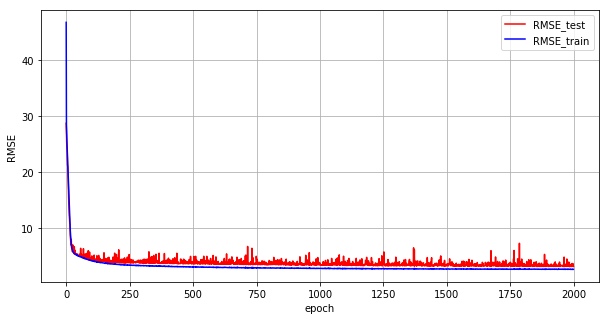

In [35]:
# plot loss and val_loss to choose the best epoch
loss_tr = Monitor.history['loss']
loss_te = Monitor.history['val_loss']

RMSE_tr = np.sqrt(loss_tr)
RMSE_te = np.sqrt(loss_te)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()

ax.plot(range(len(loss_tr)),RMSE_te,c='r')
ax.plot(range(len(loss_tr)),RMSE_tr,c='b')


ax.set_xlabel('epoch')
ax.set_ylabel('RMSE')
#ax.set_ylim(0,8)
plt.legend(['RMSE_test','RMSE_train'],loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

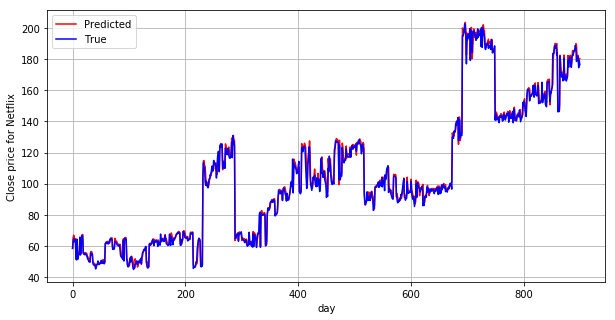

In [36]:
# plot the predicted Y and true Y on training set
Ypred = bestmodel.predict(Xtrain)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(Ypred)),Ypred,c='r')
ax.plot(range(len(Ypred)),Ytrain,c='b')
ax.set_xlabel('day')
ax.set_ylabel('Close price for Netflix')
#ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
plt.legend(['Predicted','True'],loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

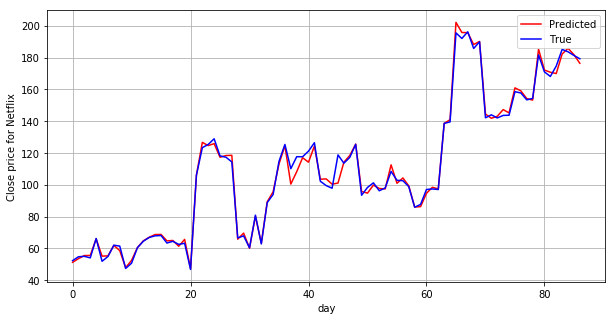

In [37]:
# plot the predicted Y and true Y on test set
Ypredt = bestmodel.predict(Xtest)

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(Ypredt)),Ypredt,c='r')
ax.plot(range(len(Ypredt)),Ytest,c='b')
ax.set_xlabel('day')
ax.set_ylabel('Close price for Netflix')
#ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
plt.legend(['Predicted','True'],loc='best')
plt.show

In [18]:
np.average(np.absolute((Ypred-Ytrain))/Ypred)

0.01937091

In [19]:
np.average(np.absolute((Ypredt-Ytest))/Ypredt)

0.018983344

<function matplotlib.pyplot.show(*args, **kw)>

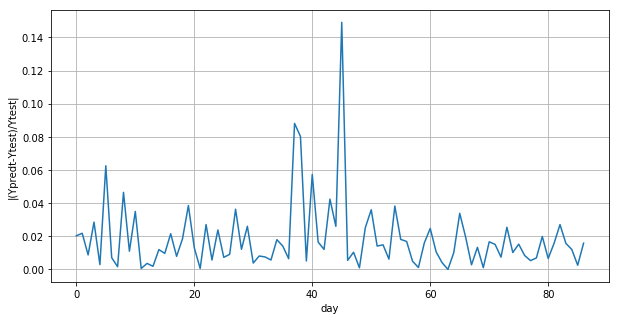

In [20]:
# plot the diffrence between predy and true y

diff = (np.array(Ypredt)-np.array(Ytest))/np.array(Ytest)

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(Ypredt)),np.abs(diff))
ax.set_xlabel('day')
ax.set_ylabel('|(Ypredt-Ytest)/Ytest|')
#ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
#plt.legend(['Predicted','True'],loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

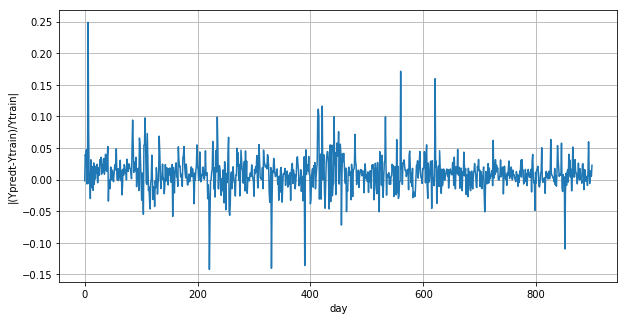

In [21]:
diff1 = (np.array(Ypred)-np.array(Ytrain))/np.array(Ytrain)

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(Ypred)),diff1)
ax.set_xlabel('day')
ax.set_ylabel('|(Ypredt-Ytrain)/Ytrain|')
#ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
#plt.legend(['Predicted','True'],loc='best')
plt.show

In [22]:
# save the prediction result to excel
np.savetxt('Ypredtr.csv',Ypred)
np.savetxt('Ypredt.csv',Ypredt)
np.savetxt('Ytr.csv',Ytrain)
np.savetxt('Yt.csv',Ytest)

<function matplotlib.pyplot.show(*args, **kw)>

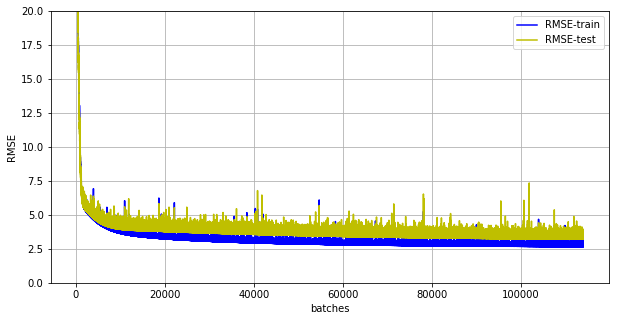

In [23]:
# Plot RMSE(AutoTrain) and RMSE(AutoTest) versus the number of batches
RMSE_train = np.sqrt(np.array(MyMonitor.MSEtrain))
RMSE_test = np.sqrt(np.array(MyMonitor.MSEtest))
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
axb=fig.add_subplot(1,1,1)
axb.grid()
axb.plot(range(len(RMSE_train)),RMSE_train,c='b')
axb.plot(range(len(RMSE_train)),RMSE_test,c='y')
axb.set_xlabel('batches')
axb.set_ylabel('RMSE')
axb.set_ylim(0,20)
plt.legend(['RMSE-train','RMSE-test'],loc='best')
plt.show

In [24]:
# display the mean activity of the neurons in hidden layer
Htrain = bestmodel.layers[0](Xtrain).numpy()
Htest = bestmodel.layers[0](Xtest).numpy()
np.savetxt('Htrain.csv',Htrain)
np.savetxt('Htest.csv',Htest)
MHtrain = np.mean(Htrain,axis=0)
MHtrain  

array([329.25607, 112.40544,  72.77997], dtype=float32)

In [25]:
W = bestmodel.get_weights()
W

[array([[ 0.19802178, -0.06095565, -0.02283583],
        [ 0.11243917,  0.03782898, -0.07787903],
        [ 0.04989646,  0.05158269, -0.07661318],
        [ 0.11424018,  0.12769975, -0.08551069],
        [ 0.14137827,  0.09000222,  0.09950337],
        [ 0.09844054,  0.13954079,  0.00084237],
        [ 0.18861482, -0.01113574,  0.1317145 ],
        [ 0.0757733 ,  0.06641022,  0.00797329],
        [ 0.05292667,  0.03042206,  0.10454715],
        [ 0.06868672,  0.02269734,  0.01767444],
        [ 0.06573845,  0.0296034 ,  0.06078247],
        [ 0.13576022,  0.02107713,  0.08464296],
        [ 0.13084818,  0.15028504,  0.07651676],
        [ 0.04925607,  0.07881065,  0.09562653],
        [ 0.07912967,  0.08211627,  0.09766207],
        [ 0.1806992 ,  0.04527479,  0.05371566],
        [ 0.21116321, -0.02242909, -0.11383355],
        [ 0.5395167 , -0.4636527 , -0.4234567 ]], dtype=float32),
 array([69.99762 , 70.000206, 70.00083 ], dtype=float32),
 array([[ 0.4988291 ],
        [-0.52697784

In [26]:
W_layer3 = W[2]
W_layer3

array([[ 0.4988291 ],
       [-0.52697784],
       [-0.54021525]], dtype=float32)

In [27]:
W_layer3 = W_layer3.reshape(3)
W_layer3

array([ 0.4988291 , -0.52697784, -0.54021525], dtype=float32)

In [28]:
# compute and display IMPj = Wj Yj = average impact of NODj on the prediction Zt
IMP = MHtrain * W_layer3
IMP  
# Identify the hidden neuron NOD* with maximal impact on Zt is the first neuron

array([164.24251 , -59.235176, -39.31685 ], dtype=float32)

In [29]:
# Compute and display the mean activities X1 ... X18 of the 18 input neurons.
MXtrain = np.mean(Xtrain,axis=0)
MXtrain

array([104.45844 , 104.09978 , 103.4062  , 102.78234 , 102.94065 ,
       103.062584, 103.23286 , 103.37311 , 103.50097 , 103.6049  ,
       103.7338  , 103.85694 , 104.00895 , 104.16254 , 104.321304,
       104.52238 , 104.596855, 104.68912 ], dtype=float32)

In [30]:
Xtrain

array([[ 56.547714,  52.743572,  50.9455  , ...,  58.11    ,  57.202858,
         57.81    ],
       [ 64.10114 ,  64.304   ,  66.018   , ...,  64.10714 ,  64.222855,
         64.454285],
       [ 65.935715,  64.943146,  64.92157 , ...,  65.17857 ,  66.69428 ,
         65.94572 ],
       ...,
       [172.014   , 169.931   , 170.8715  , ..., 174.69    , 174.71    ,
        174.74    ],
       [175.582   , 171.698   , 170.5755  , ..., 174.74    , 174.52    ,
        179.25    ],
       [176.444   , 172.692   , 170.7365  , ..., 174.52    , 179.25    ,
        179.      ]], dtype=float32)

In [31]:
# Display all the weights U1 ... U18 linking the input nodes INP1 ... INP18 to the neuron NOD*
W_layer2 = W[0]
W_layer2
W_layer2_NOD = W_layer2[:,0]
W_layer2_NOD

array([0.19802178, 0.11243917, 0.04989646, 0.11424018, 0.14137827,
       0.09844054, 0.18861482, 0.0757733 , 0.05292667, 0.06868672,
       0.06573845, 0.13576022, 0.13084818, 0.04925607, 0.07912967,
       0.1806992 , 0.21116321, 0.5395167 ], dtype=float32)

In [32]:
# compute Fs= Us Xs which is the average impact of input feature "s" on the key hidden neuron NOD*
Fs = MXtrain * W_layer2_NOD
Fs
# Identify the 5 input features with the largest impact on NOD*. 

array([20.685047 , 11.704892 ,  5.159603 , 11.741874 , 14.553571 ,
       10.145536 , 19.471247 ,  7.8329215,  5.4779615,  7.116281 ,
        6.8192997, 14.099641 , 13.609383 ,  5.130637 ,  8.2549095,
       18.88711  , 22.087008 , 56.481525 ], dtype=float32)